## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_data = mouse_metadata.merge(study_results, how='inner', on='Mouse ID')

# Display the data table for preview
mouse_data.head(30)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
# Checking the number of mice.
mouse_count = mouse_data['Mouse ID'].nunique()

mouse_count

249

In [6]:
total_count = len(mouse_data)

total_count

1893

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
double_mice = mouse_data[mouse_data.duplicated(['Mouse ID', 'Timepoint'])]

double_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_mouse = mouse_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
bad_rat = mouse_data[mouse_data['Mouse ID'] == "g989"].index
mouse_data.drop(bad_rat, inplace=True)

mouse_count2 = mouse_data['Mouse ID'].nunique()
total_count2 = len(mouse_data)

mouse_count2
total_count2

1880

In [10]:
### Harch Check no g989 mouse points exists
double_mice2 = mouse_data[mouse_data.duplicated(['Mouse ID', 'Timepoint'])]

g989 = mouse_data[mouse_data['Mouse ID'] == 'g989']

g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [11]:
# Checking the number of mice in the clean DataFrame.
mouse_count2

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_summary = mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()

#drug_summary

#drug_data = mouse_data.groupby("Drug Regimen", as_index=False)["Tumor Volume (mm3)"].mean()
#drug_median = mouse_data.groupby("Drug Regimen", as_index=False)["Tumor Volume (mm3)"].median()
#drug_mode = mouse_data.groupby("Drug Regimen", as_index=False)["Tumor Volume (mm3)"].mode()
#drug_data = drug_data.merge(drug_median, how="outer", on="Drug Regimen")
#drug_data = drug_data.merge(drug_mode, how="outer", on="Drug Regimen")
#drug_data

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


drug_summary['sem'] = drug_summary['std']/drug_summary['count']**(1/2)

unique_mouse = mouse_data.groupby("Drug Regimen", as_index=False)["Mouse ID"].nunique()

drug_summary = drug_summary.merge(unique_mouse, how='outer', on='Drug Regimen')

drug_summary = drug_summary.rename(columns={'Mouse ID': 'Unique Mice'})

drug_summary = drug_summary.set_index('Drug Regimen')

drug_summary

,count,mean,std,min,25%,50%,75%,max,sem,Unique Mice
Drug Regimen,,,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209,0.329346,25
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185,0.469821,25
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731,0.492236,25
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014,0.603860,25
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817,0.596466,25
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939,0.581331,25
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421,0.544332,24
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816,0.320955,25
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690,0.573111,24


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Unique Mice'>

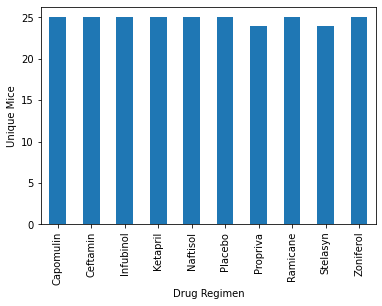

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#drug_summary.plot(x=drug_summary.index.values, y=drug_summary['Unique Mice'], kind="bar", title="Unique Mice Subjects Per Drug Regimen", xlabel="Drug Regimen")

drug_mouse = drug_summary['Unique Mice']

drug_mouse.plot(kind='bar', ylabel="Unique Mice")

<function matplotlib.pyplot.show(close=None, block=None)>

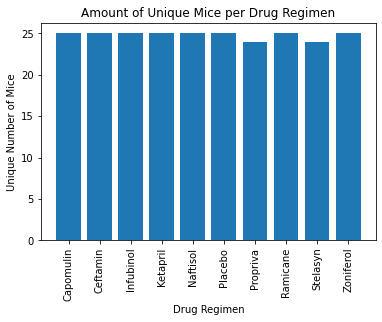

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(drug_summary.index.values, drug_summary['Unique Mice'], align='center')
plt.xticks(rotation=90)
plt.title("Amount of Unique Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Unique Number of Mice")
plt.show


<AxesSubplot:ylabel='Mouse ID'>

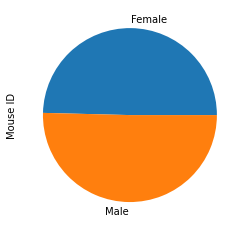

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex = mouse_data.groupby(mouse_data['Sex'], as_index=True)['Mouse ID'].nunique()

mouse_sex.plot(y='Mouse ID', kind='pie')

In [16]:
mouse_sex

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

Text(0.5, 1.0, 'Mouse Sex Ratio')

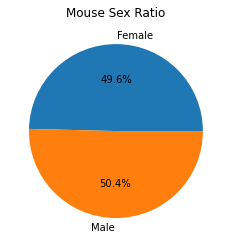

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyp
plt.pie(mouse_sex, labels=mouse_sex.index.values, autopct="%1.1f%%")
plt.title("Mouse Sex Ratio")


## Quartiles, Outliers and Boxplots

In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#car_data = car_data.loc[car_data['horsepower'] != "?"]
tumor_last = mouse_data.loc[mouse_data['Timepoint'] == 45]

tumor_last = tumor_last[['Mouse ID', 'Tumor Volume (mm3)']]

tumor_last.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumor_data = mouse_data.merge(tumor_last, how='inner', on=['Mouse ID'])

tumor_data = tumor_data.loc[tumor_data['Timepoint'] == 45, :]

find_high_time = mouse_data.groupby(mouse_data['Mouse ID'], as_index=False)['Timepoint'].max()

find_high_time
#tumor_data


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [61]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
cap_data = []
ram_data = []
inf_data = []
cef_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_data['Tumor Volume (mm3)_y'].quantile([.25, .5, .75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

only_cap = tumor_data.loc[tumor_data['Drug Regimen'] == 'Capomulin', :]
cap_values = only_cap['Tumor Volume (mm3)_y']
cap_data = cap_values.tolist()

only_ram = tumor_data.loc[tumor_data['Drug Regimen'] == 'Ramicane', :]
ram_values = only_ram['Tumor Volume (mm3)_y']
ram_data = ram_values.tolist()

only_inf = tumor_data.loc[tumor_data['Drug Regimen'] == 'Infubinol', :]
inf_values = only_inf['Tumor Volume (mm3)_y']
inf_data = inf_values.tolist()

only_cef = tumor_data.loc[tumor_data['Drug Regimen'] == 'Ceftamin', :]
cef_values = only_cef['Tumor Volume (mm3)_y']
cef_data = cef_values.tolist()

    # add subset 
print(len(cap_data))
print(len(ram_data))
print(len(inf_data))
print(len(cef_data))

#box_test_dict = {"Capomulin": cap_data, "Ramicane": ram_data, "Infubinol": inf_data, "Ceftamin": cef_data}



#box_test = pd.DataFrame(data=box_test_dict)

    
    # Determine outliers using upper and lower bounds
#cap_data

Values below -1.6595831850000096 could be outliers.
Values above 111.18822347500002 could be outliers.
21
20
9
13


In [56]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#fig1, ax1 = plt.subplots()
#ax1.boxplot(cap_values)
#fig1, ax2 = plt.subplots()
#ax2.boxplot(ram_values)
#fig1, ax3 = plt.subplots()
#ax3.boxplot(inf_values)
#fig1, ax4 = plt.subplots()
#ax4.boxplot(cef_values)

#box_test.boxplot()




## Line and Scatter Plots

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
